- Evan Perez
- 24212505

Property Price dataset: https://data.bis.org/bulkdownload

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
import numpy as np

import seaborn as sns




In [70]:
df = pd.read_csv('/content/drive/MyDrive/RealEstate_Property_Prices.csv',header =0)

df.head(10)

,FREQ,Frequency,REF_AREA,Reference area,VALUE,Value,UNIT_MEASURE,Unit of measure,BREAKS,COVERAGE,...,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2
0,Q,Quarterly,PE,Peru,R,Real,628,"Index, 2010 = 100",NaN,NaN,...,119.9112,117.8188,115.0823,113.3167,111.2452,110.8112,110.2764,112.4389,109.5304,108.8619
1,Q,Quarterly,AE,United Arab Emirates,N,Nominal,628,"Index, 2010 = 100",NaN,NaN,...,136.1527,137.2231,139.3289,143.5030,148.1544,155.4429,162.6627,167.7580,175.3841,NaN
2,Q,Quarterly,MK,North Macedonia,R,Real,771,"Year-on-year changes, in per cent",NaN,NaN,...,4.3654,3.7391,3.5105,0.9539,2.3688,1.6053,3.0750,3.4049,1.2167,7.3157
3,Q,Quarterly,4T,Emerging market economies (aggregate),N,Nominal,771,"Year-on-year changes, in per cent",NaN,NaN,...,7.9573,8.5775,8.4386,6.6094,5.1711,4.0992,3.7835,3.6287,3.3248,NaN
4,Q,Quarterly,HK,Hong Kong SAR,R,Real,628,"Index, 2010 = 100",NaN,NaN,...,183.5552,182.7035,174.6389,160.7623,161.6107,163.5059,156.7105,145.3754,140.2602,140.9037
5,Q,Quarterly,SG,Singapore,R,Real,628,"Index, 2010 = 100",NaN,NaN,...,108.9783,110.5894,112.6366,112.0944,114.4145,113.0757,112.9369,115.1405,116.5238,NaN
6,Q,Quarterly,HR,Croatia,R,Real,771,"Year-on-year changes, in per cent",NaN,NaN,...,6.6125,2.5448,2.1117,3.5696,1.9724,5.2311,3.3893,4.2442,4.8196,NaN
7,Q,Quarterly,PH,Philippines,R,Real,771,"Year-on-year changes, in per cent",NaN,NaN,...,2.3183,-2.7076,-0.0104,-0.1611,1.7777,7.6341,7.1124,2.0412,2.7129,NaN
8,Q,Quarterly,4T,Emerging market economies (aggregate),R,Real,628,"Index, 2010 = 100",NaN,NaN,...,119.0658,118.4086,118.1093,117.4618,117.1666,117.9114,116.6393,116.0371,115.5186,NaN
9,Q,Quarterly,HK,Hong Kong SAR,N,Nominal,771,"Year-on-year changes, in per cent",NaN,NaN,...,-0.0519,-2.2563,-7.4229,-13.5530,-10.2440,-8.7130,-8.5882,-7.2525,-11.5288,-12.7579


In [71]:
df = df[['Reference area', 'Unit of measure', '2011-Q1','2012-Q1','2013-Q1','2014-Q1','2015-Q1','2016-Q1','2017-Q1','2018-Q1','2019-Q1','2020-Q1','2021-Q1']]

df = df.loc[:, ~df.columns.duplicated()].copy()

df.head(10)

,Reference area,Unit of measure,2011-Q1,2012-Q1,2013-Q1,2014-Q1,2015-Q1,2016-Q1,2017-Q1,2018-Q1,2019-Q1,2020-Q1,2021-Q1
0,Peru,"Index, 2010 = 100",110.8822,127.0881,147.3790,152.3553,147.3179,133.0081,135.1832,132.9332,133.5102,130.6543,130.1122
1,United Arab Emirates,"Index, 2010 = 100",97.4951,104.2505,120.9717,160.9507,170.4379,155.8564,155.0962,148.1893,134.9744,126.0028,123.3484
2,North Macedonia,"Year-on-year changes, in per cent",-7.0902,-0.1194,-8.5565,-2.7935,2.3733,2.4128,-4.2583,2.4360,0.4899,1.6518,1.0717
3,Emerging market economies (aggregate),"Year-on-year changes, in per cent",6.2578,7.3006,6.9587,7.8009,3.1552,3.1336,5.9554,4.5794,5.6135,4.6947,4.9985
4,Hong Kong SAR,"Index, 2010 = 100",111.9423,112.5497,139.2015,137.4699,156.0895,144.2406,164.4446,185.6542,183.9822,184.6611,186.4898
5,Singapore,"Index, 2010 = 100",103.5480,102.1264,101.6750,99.9487,96.4287,93.9724,90.7981,95.4813,97.9771,99.9163,105.7492
6,Croatia,"Year-on-year changes, in per cent",-5.0968,0.8976,-9.6455,-1.9867,-1.3225,1.3861,-1.3645,7.3816,6.8929,7.6436,4.1918
7,Philippines,"Year-on-year changes, in per cent",-0.3848,6.9321,4.3334,9.4389,8.4043,10.2496,3.6929,-1.9118,-0.6273,9.7877,-7.9157
8,Emerging market economies (aggregate),"Index, 2010 = 100",98.8996,101.4389,104.5184,108.2372,107.4580,106.8105,109.8479,111.5370,114.3693,114.5237,117.3621
9,Hong Kong SAR,"Year-on-year changes, in per cent",24.3844,5.7861,28.1756,2.8495,18.4113,-5.0138,14.6584,15.6630,1.2627,2.2409,2.2006


In [72]:

filtered_df = df[df['Unit of measure'] == 'Year-on-year changes, in per cent']

filtered_df.head(50)

,Reference area,Unit of measure,2011-Q1,2012-Q1,2013-Q1,2014-Q1,2015-Q1,2016-Q1,2017-Q1,2018-Q1,2019-Q1,2020-Q1,2021-Q1
2,North Macedonia,"Year-on-year changes, in per cent",-7.0902,-0.1194,-8.5565,-2.7935,2.3733,2.4128,-4.2583,2.4360,0.4899,1.6518,1.0717
3,Emerging market economies (aggregate),"Year-on-year changes, in per cent",6.2578,7.3006,6.9587,7.8009,3.1552,3.1336,5.9554,4.5794,5.6135,4.6947,4.9985
6,Croatia,"Year-on-year changes, in per cent",-5.0968,0.8976,-9.6455,-1.9867,-1.3225,1.3861,-1.3645,7.3816,6.8929,7.6436,4.1918
7,Philippines,"Year-on-year changes, in per cent",-0.3848,6.9321,4.3334,9.4389,8.4043,10.2496,3.6929,-1.9118,-0.6273,9.7877,-7.9157
9,Hong Kong SAR,"Year-on-year changes, in per cent",24.3844,5.7861,28.1756,2.8495,18.4113,-5.0138,14.6584,15.6630,1.2627,2.2409,2.2006
10,Singapore,"Year-on-year changes, in per cent",13.7490,3.4435,3.5327,-0.7218,-3.8334,-3.3677,-2.7738,5.4134,3.1228,2.3554,6.6403
14,Brazil,"Year-on-year changes, in per cent",14.8035,7.9434,3.1260,2.5114,-4.3481,-11.3424,-7.1490,-3.1407,-1.8640,2.2058,3.6704
17,Italy,"Year-on-year changes, in per cent",1.2842,0.5917,-7.1429,-4.3439,-5.6764,0.1003,-0.7014,-0.5045,-0.9128,1.7400,1.7103
18,South Africa,"Year-on-year changes, in per cent",3.2286,4.6819,4.9920,7.9859,6.2145,5.8711,3.7313,3.9312,3.2613,1.2477,6.3093
20,Germany,"Year-on-year changes, in per cent",1.0961,0.4241,1.6097,1.0901,4.2395,5.8942,5.0614,5.3008,3.9074,5.2865,7.6968


In [89]:

year_columns = [col for col in filtered_df.columns if 'Q1' in col]

stats_dict = {}

#Calculate and store statistics
for year in year_columns:
    data = filtered_df[year].dropna()

    #Calculate statistics
    max_val = data.max()
    min_val = data.min()
    mean_val = data.mean()
    median_val = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    outliers = data[(data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))]

    #Save statistics
    stats_dict[year] = {
        'max': max_val,
        'min': min_val,
        'mean': mean_val,
        'median': median_val,
        'outliers': list(outliers)
    }



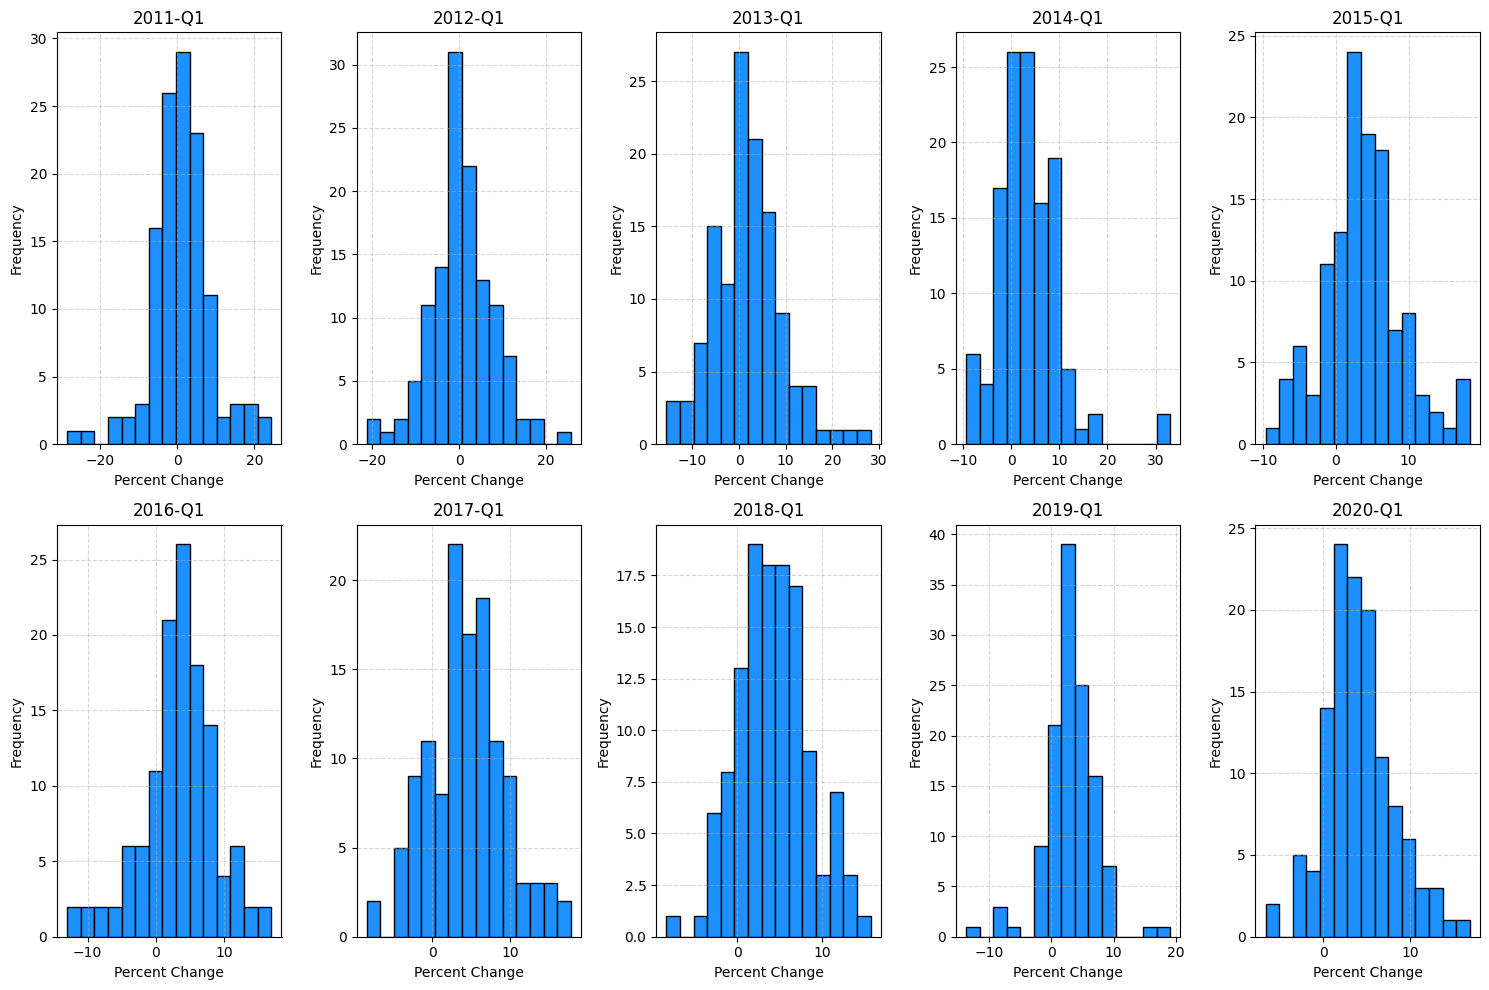

--2011-Q1--
{'max': 24.3844, 'min': -28.5699, 'mean': 1.2493879032258064, 'median': 1.07105, 'outliers': [24.3844, 19.7896, -21.7758, 19.7527, -28.5699, -17.5184, -16.3254, 21.8096, 18.5122]}
----------


--2012-Q1--
{'max': 25.7973, 'min': -21.2759, 'mean': 0.7968266129032258, 'median': 0.4275, 'outliers': [25.7973, 17.0246, -19.5462, -15.8301, -21.2759, 19.4379]}
----------


--2013-Q1--
{'max': 28.1756, 'min': -15.5622, 'mean': 1.7697129032258065, 'median': 1.5574, 'outliers': [28.1756, 23.68, 19.9106, -15.5622, -15.0411, 19.0246]}
----------


--2014-Q1--
{'max': 33.0482, 'min': -9.4511, 'mean': 3.4871459677419354, 'median': 2.92995, 'outliers': [33.0482, 30.8475]}
----------


--2015-Q1--
{'max': 18.4113, 'min': -9.6504, 'mean': 3.756314516129032, 'median': 3.43425, 'outliers': [18.4113, 17.5069, -9.6504, 17.5038, 15.6433, 18.1717]}
----------


--2016-Q1--
{'max': 16.8716, 'min': -13.0057, 'mean': 3.3434403225806455, 'median': 3.68205, 'outliers': [-11.3424, -8.5553, -9.7136, -7.

In [90]:
year_columns = [col for col in filtered_df.columns if 'Q1' in col][:10]


fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 5, figure=fig)

for i, year in enumerate(year_columns):

    ax = fig.add_subplot(gs[i // 5, i % 5])

    data = filtered_df[year].dropna().values.flatten()

    #histogram
    ax.hist(data, bins=15, color='dodgerblue', edgecolor='black')
    ax.set_title(f'{year}')
    ax.set_xlabel('Percent Change')
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

#Print max,min,mean, median, and outliers
for yr in stats_dict:
  print(f"--{yr}--")
  print(stats_dict[yr])
  print('----------')
  print('\n')


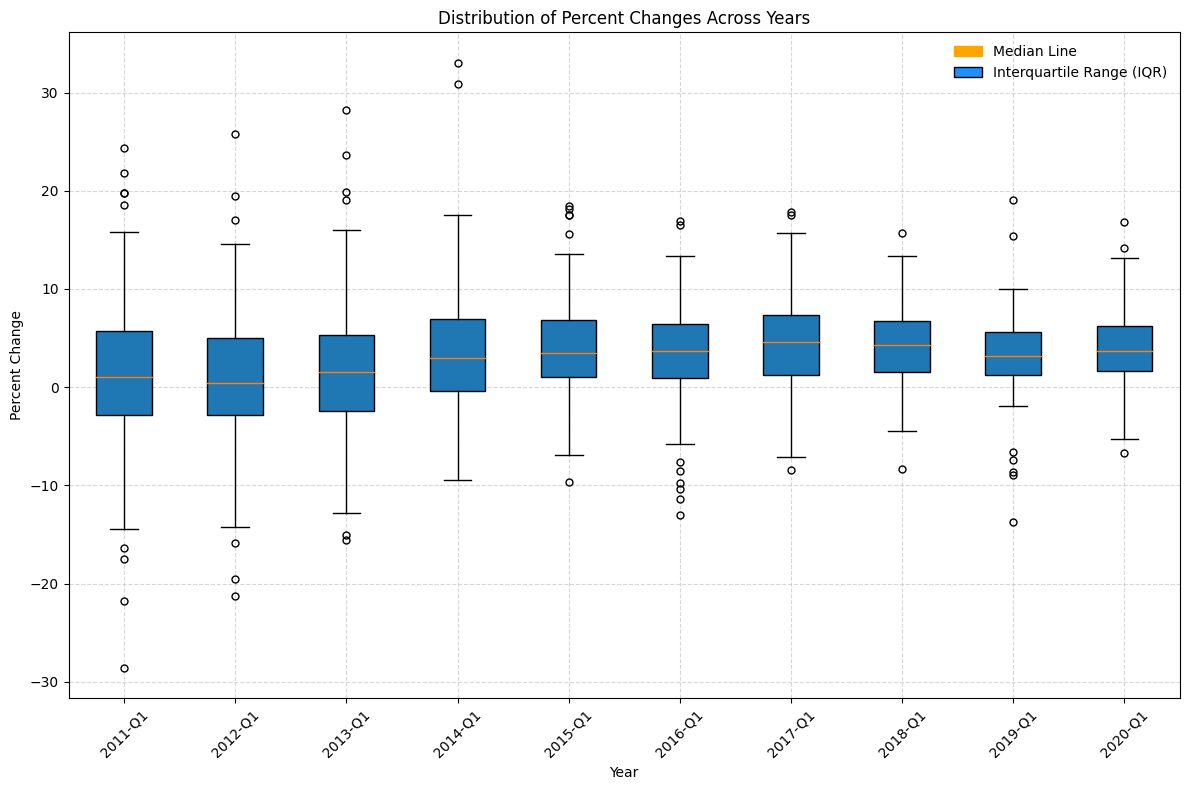

In [82]:
data_for_boxplot = [filtered_df[year].dropna().values.flatten() for year in year_columns]

plt.figure(figsize=(12, 8))
boxplot = plt.boxplot(data_for_boxplot, labels=year_columns, patch_artist=True, flierprops=dict(marker='o', color='red', markersize=5))

plt.title('Distribution of Percent Changes Across Years')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

median_patch = mpatches.Patch(color='orange', label='Median Line')
quartile_patch = mpatches.Patch(facecolor='dodgerblue', edgecolor='black', label='Interquartile Range (IQR)')

plt.legend(handles=[median_patch, quartile_patch], loc='upper right', frameon=False)
plt.tight_layout()
plt.show()


#Pair-Wise Relationships

In [83]:
numerical_data = filtered_df.loc[:, ~filtered_df.columns.duplicated()].copy()

numerical_data = numerical_data[['2011-Q1', '2012-Q1', '2013-Q1', '2014-Q1', '2015-Q1',
                                 '2016-Q1', '2017-Q1', '2018-Q1', '2019-Q1', '2020-Q1', '2021-Q1']]

numerical_data = numerical_data.dropna()

numerical_data.head()

,2011-Q1,2012-Q1,2013-Q1,2014-Q1,2015-Q1,2016-Q1,2017-Q1,2018-Q1,2019-Q1,2020-Q1,2021-Q1
2,-7.0902,-0.1194,-8.5565,-2.7935,2.3733,2.4128,-4.2583,2.4360,0.4899,1.6518,1.0717
3,6.2578,7.3006,6.9587,7.8009,3.1552,3.1336,5.9554,4.5794,5.6135,4.6947,4.9985
6,-5.0968,0.8976,-9.6455,-1.9867,-1.3225,1.3861,-1.3645,7.3816,6.8929,7.6436,4.1918
7,-0.3848,6.9321,4.3334,9.4389,8.4043,10.2496,3.6929,-1.9118,-0.6273,9.7877,-7.9157
9,24.3844,5.7861,28.1756,2.8495,18.4113,-5.0138,14.6584,15.6630,1.2627,2.2409,2.2006


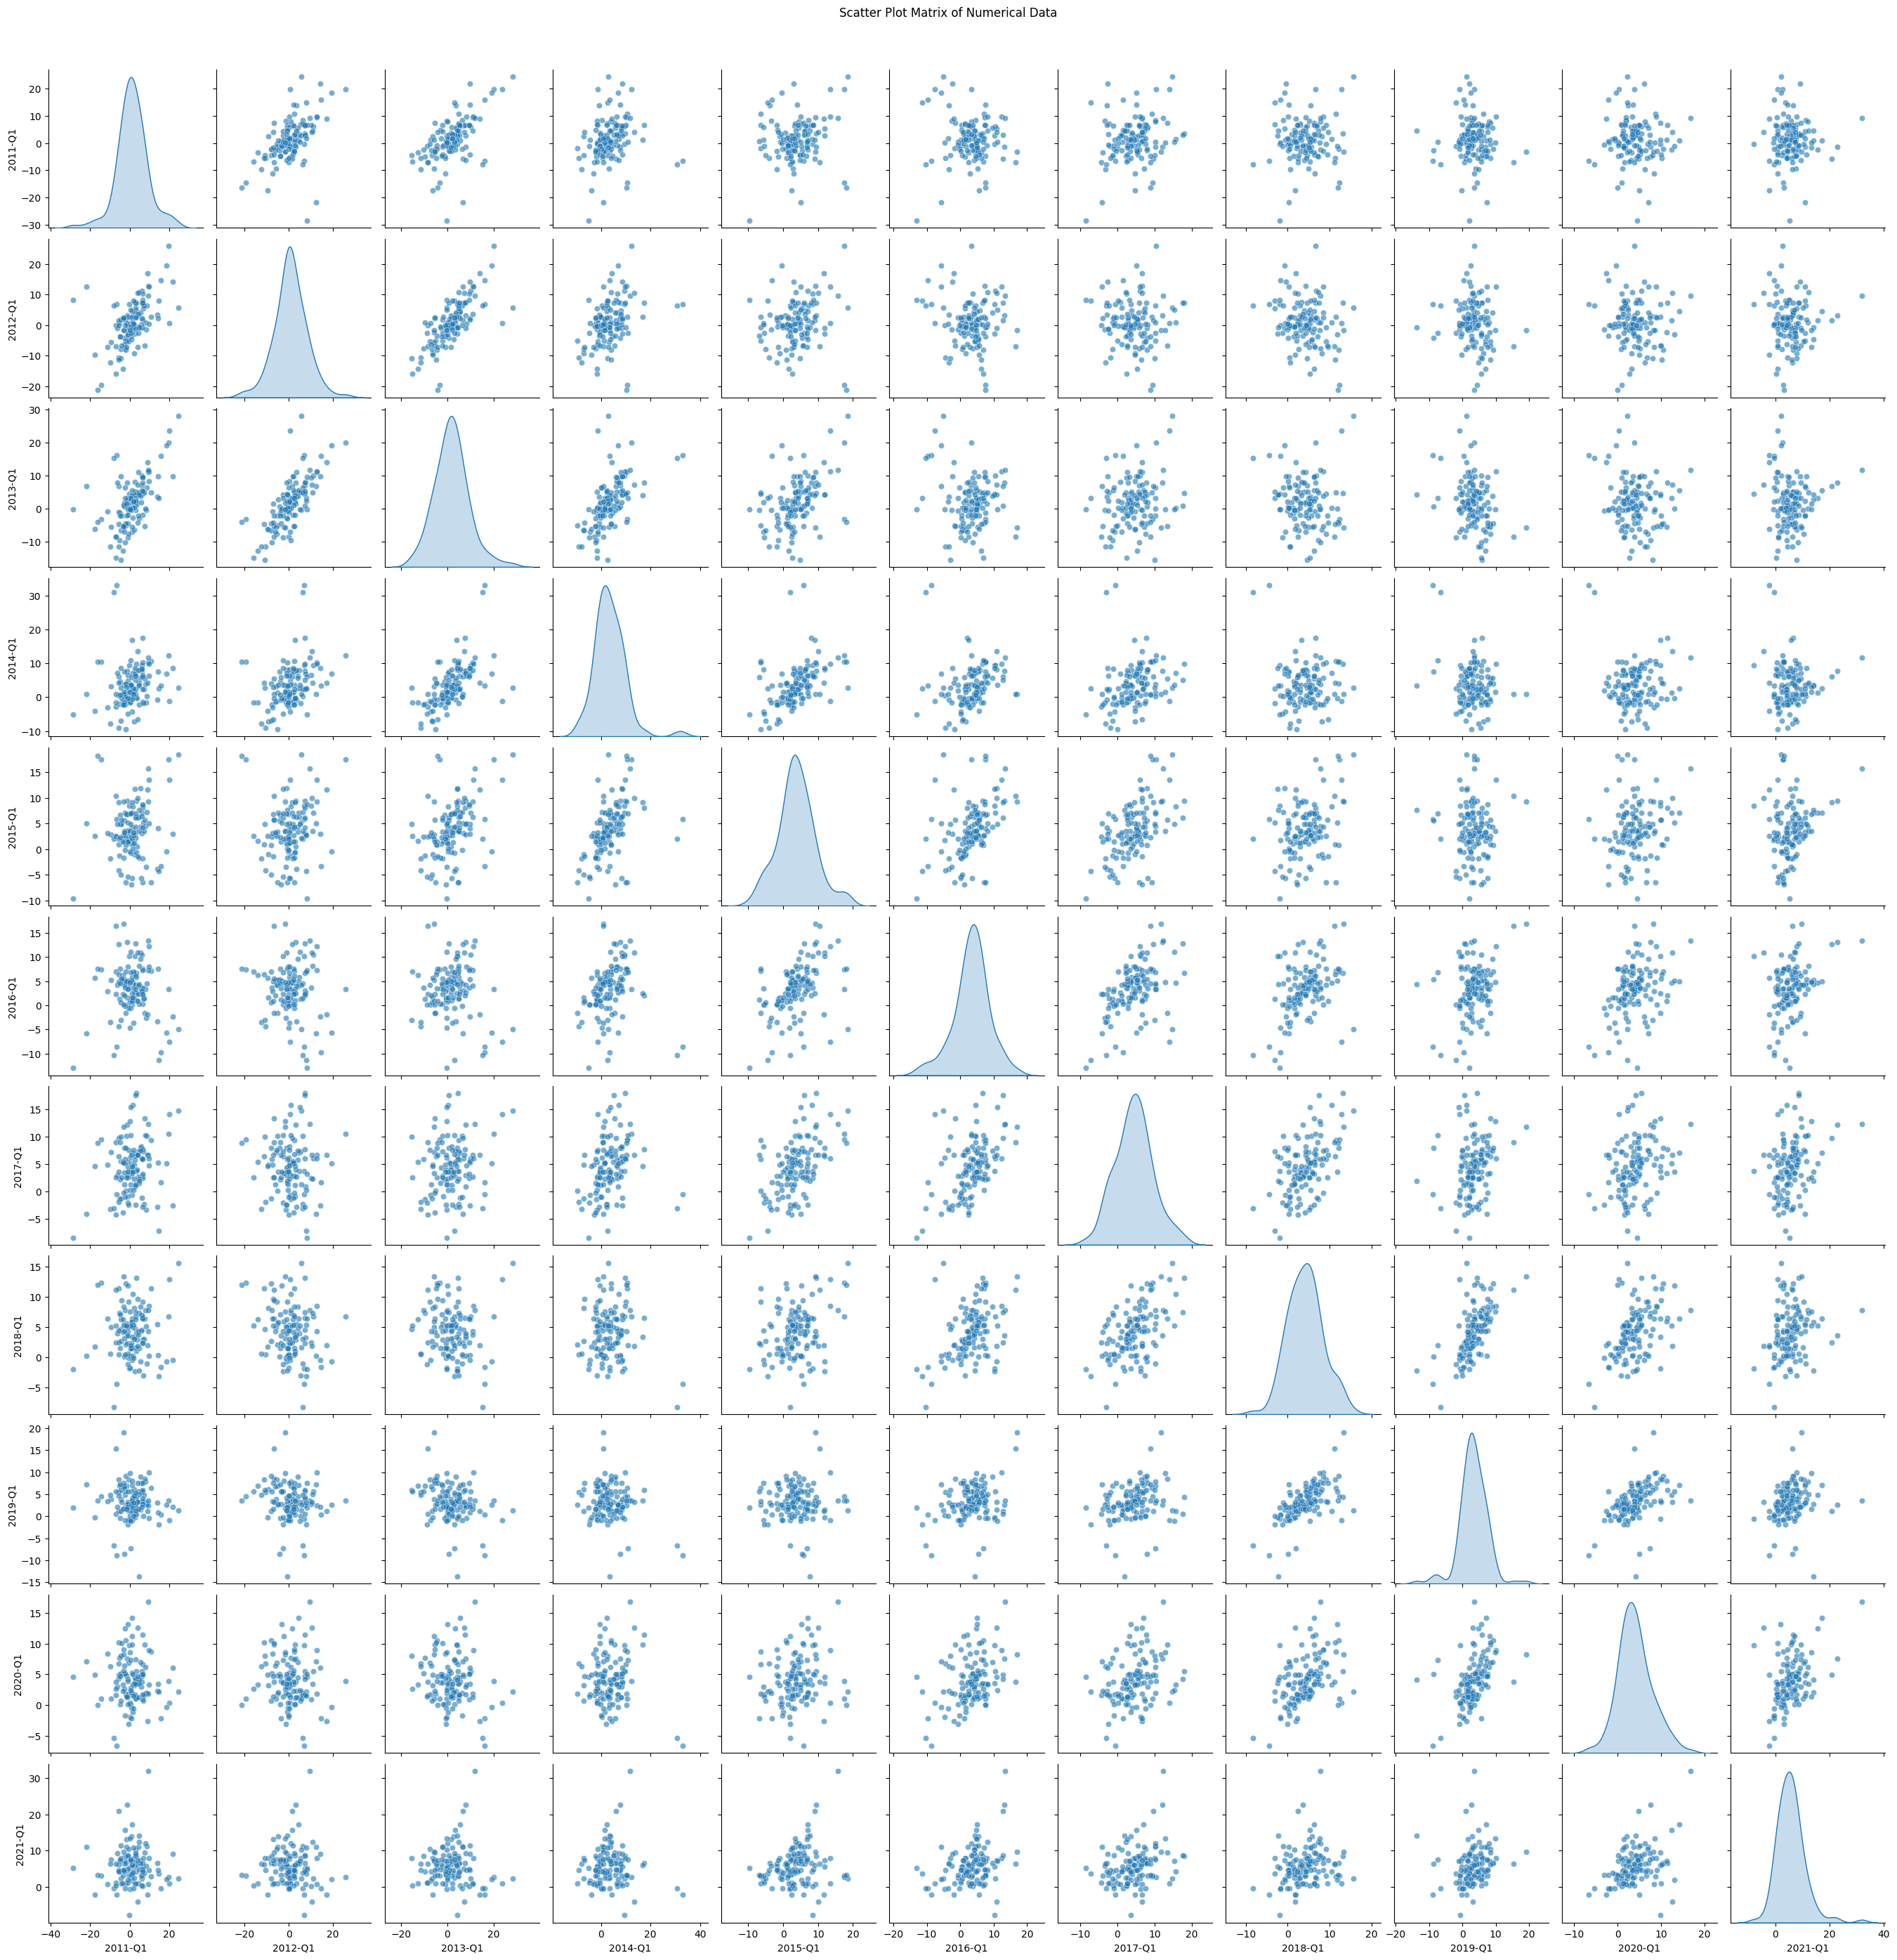

In [85]:
#Pairplot to show paiwise relationships
sns.pairplot(numerical_data, diag_kind="kde", plot_kws={'alpha': 0.6})
plt.suptitle("Scatter Plot Matrix of Numerical Data", y=1.02)
plt.show()


<ipython-input-86-758fb4faeb0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregated_data, x='Reference area', y='2021-Q1', palette='viridis')


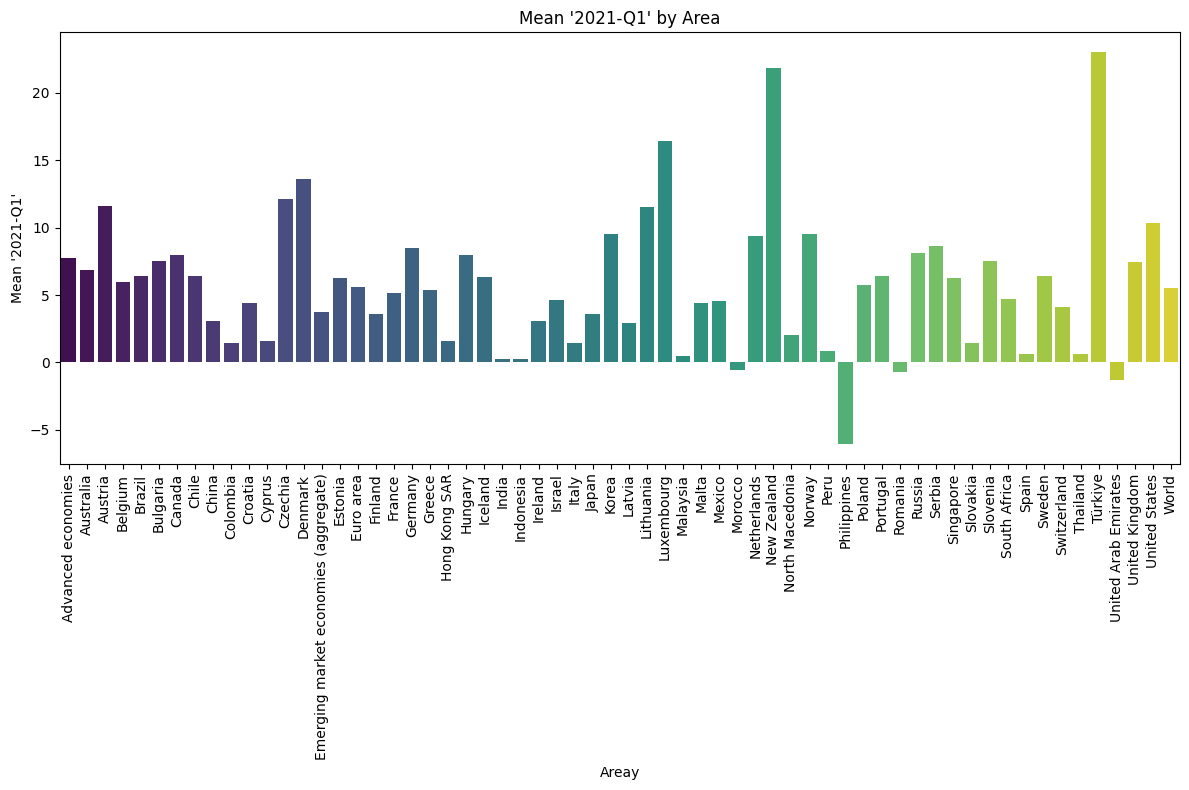

In [86]:
#Aggregate reference area to 2021-Q1 mean data
aggregated_data = filtered_df.groupby('Reference area')['2021-Q1'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=aggregated_data, x='Reference area', y='2021-Q1', palette='viridis')
plt.title("Mean '2021-Q1' by Area")
plt.xlabel("Areay")
plt.ylabel("Mean '2021-Q1'")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


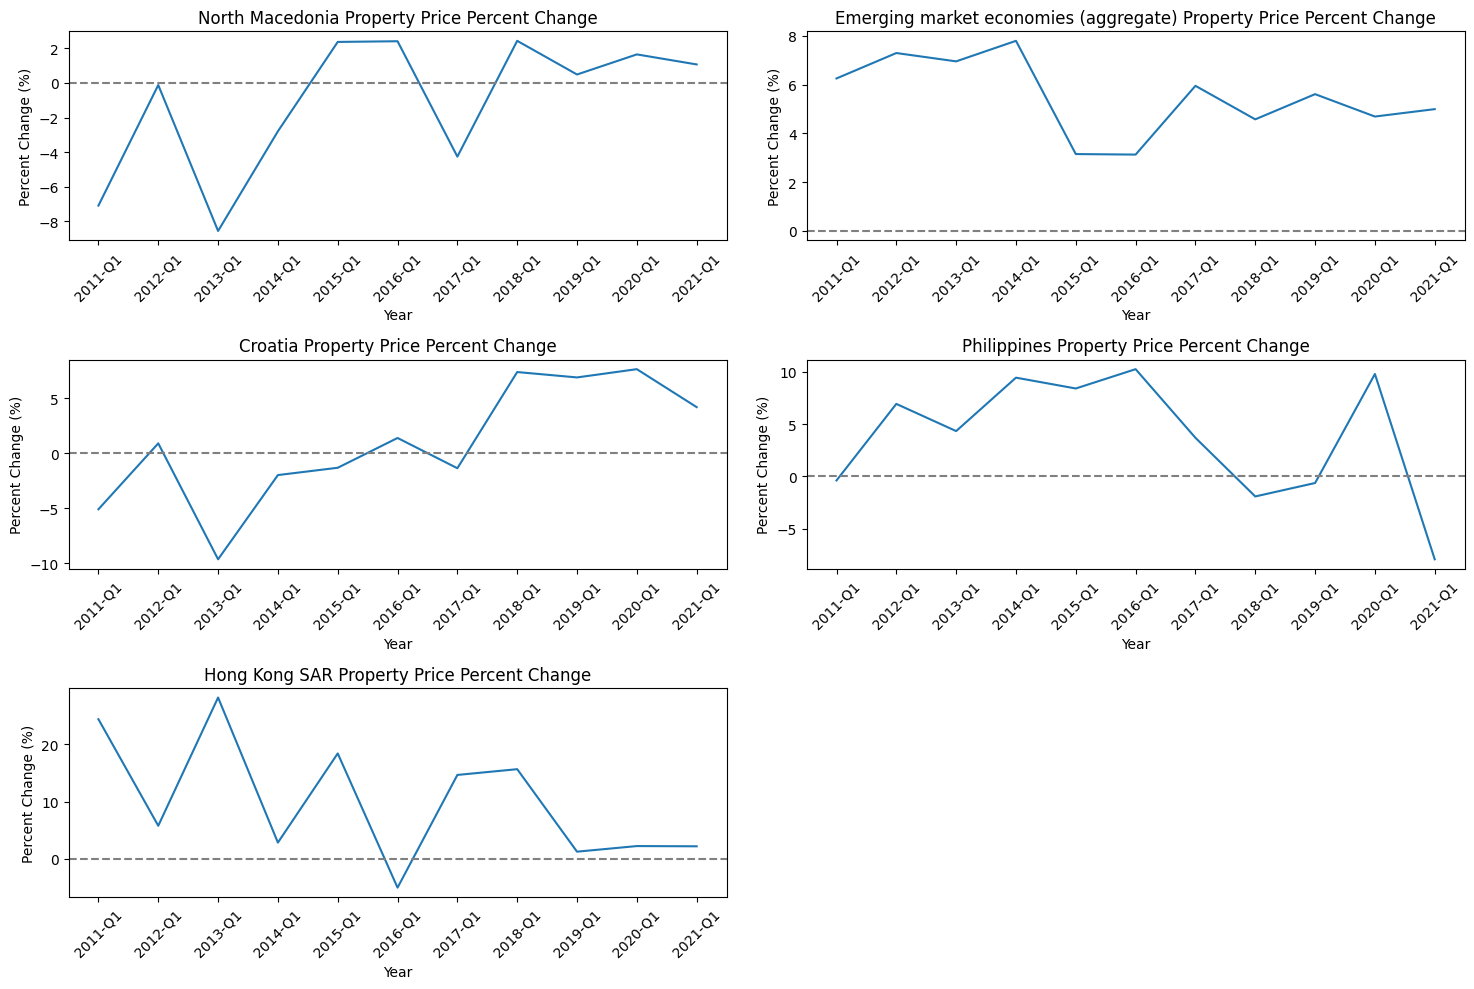

In [87]:
#Tine Series plot showing relationships between area(categorical and annual percent change (numerical)
percent_change = filtered_df.loc[:, '2011-Q1':]


fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 2)


for i in range(5):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    ax.plot(percent_change.columns, percent_change.iloc[i])
    ax.set_title(f"{filtered_df['Reference area'].iloc[i]} Property Price Percent Change")
    ax.set_xlabel("Year")
    ax.set_ylabel("Percent Change (%)")
    ax.axhline(0, color='gray', linestyle='--')  #
    ax.set_xticks(range(len(percent_change.columns)))
    ax.set_xticklabels(percent_change.columns, rotation=45)


plt.tight_layout()
plt.show()